In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/MANTA_final_baseline/reconverged_v12_long_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_v12_long_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_v12_long_last_ii2.hdf5
*** For isimpon=2, set afracs, not afrac ***
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 1.08e+05



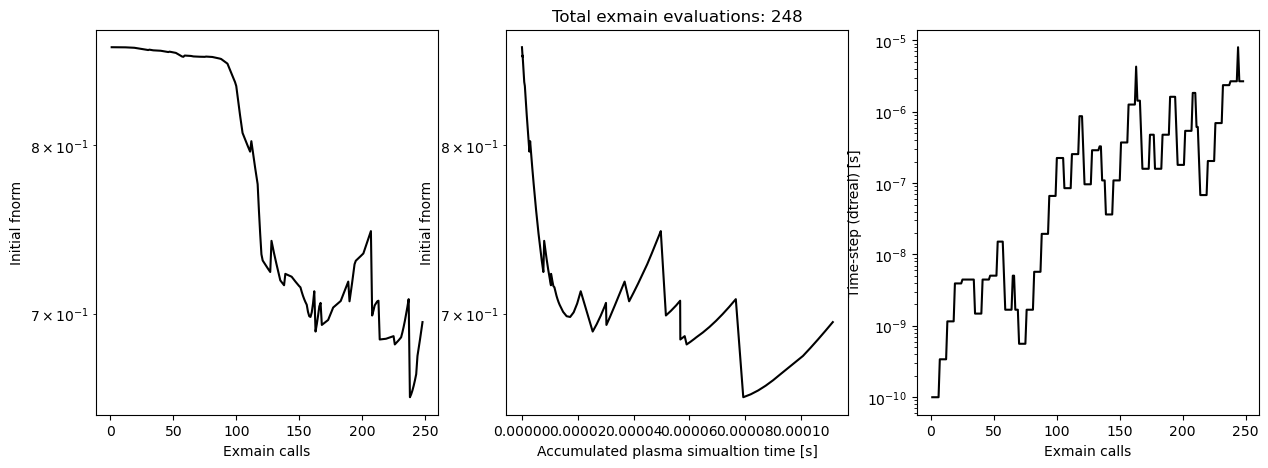

In [29]:
c=Case('reconverged_v12_long_last_ii2.hdf5')
c.solver.convergenceanalysis('reconverged_v12_long_last_ii2.hdf5');

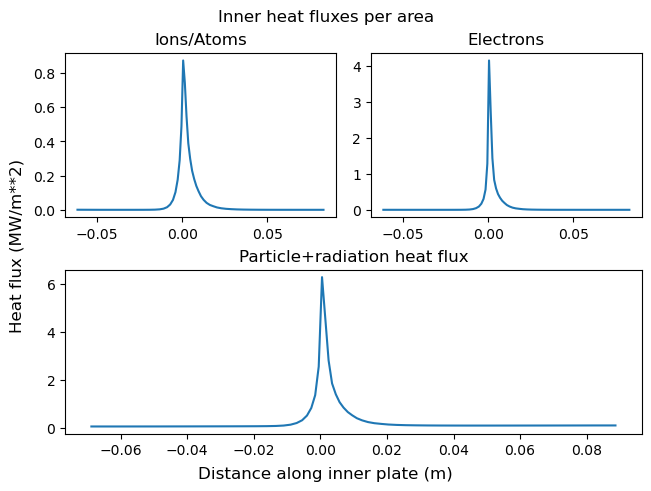

In [31]:
# %matplotlib widget
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Inner heat fluxes per area')
fig.supxlabel('Distance along inner plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yylb[1:-1],bbb.sdelb[1:-1,0]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yylb[1:-1],bbb.sdilb[1:-1]*1e-6) #polodal east field area

bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
plt.show()

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)

axs[0].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
axs[1].plot(x, bbb.sdelb[1:-1,0]*1e-6, '-b', label='elc')
axs[1].plot(x, bbb.sdilb[1:-1]*1e-6, '-r', label='ion')

<Figure size 640x480 with 0 Axes>

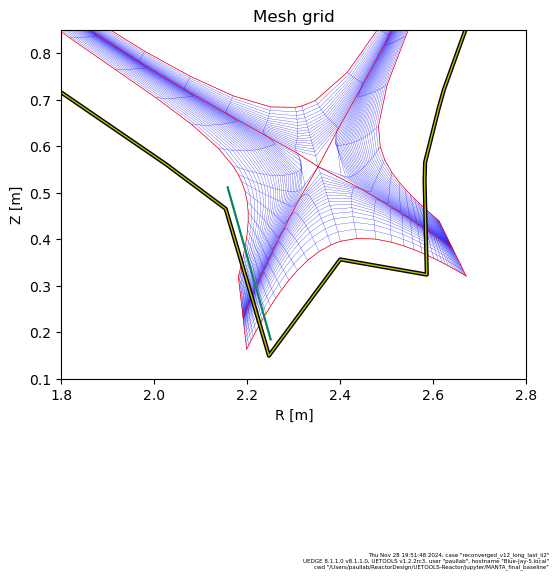

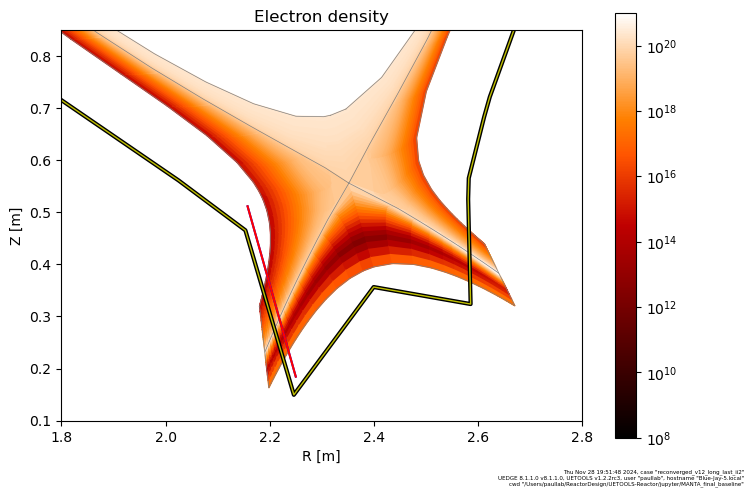

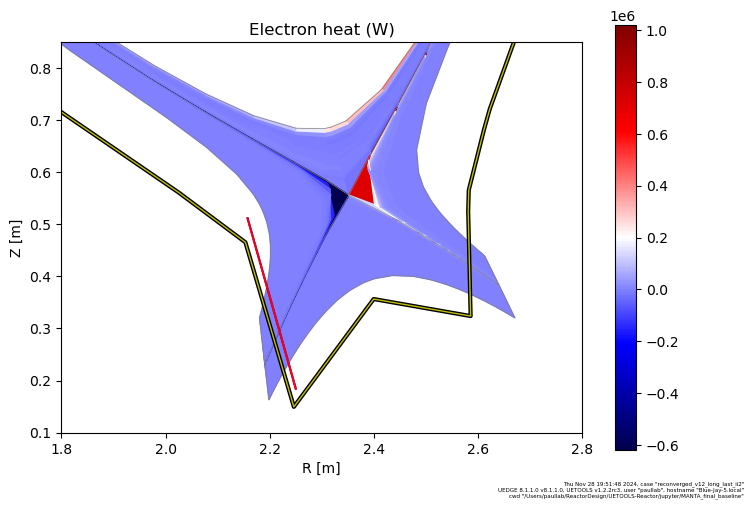

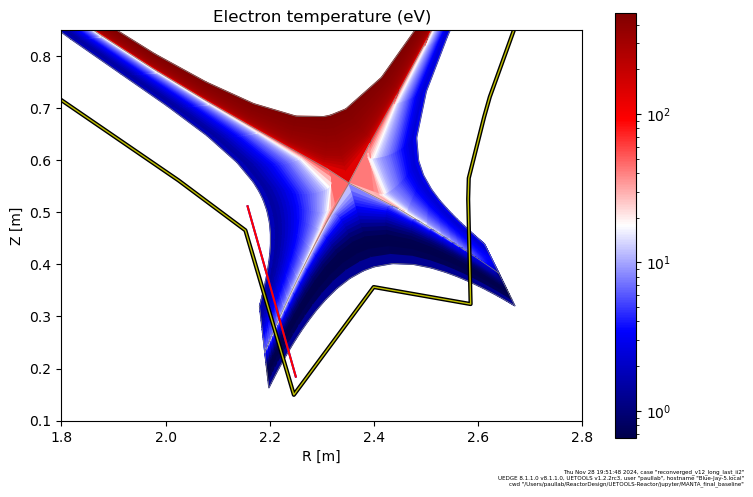

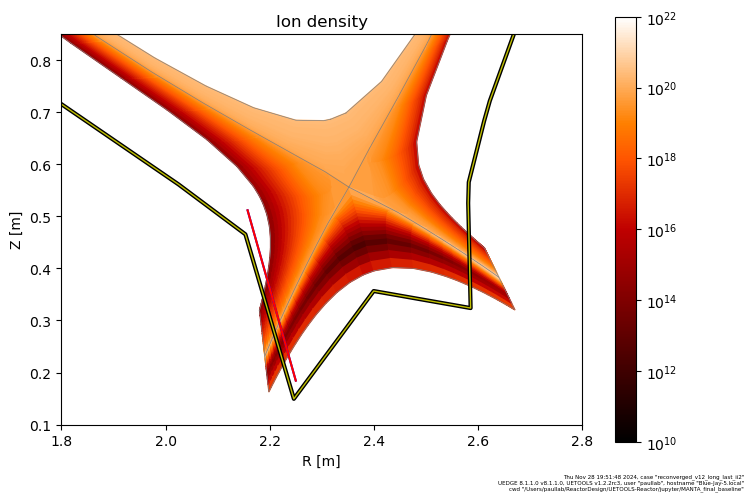

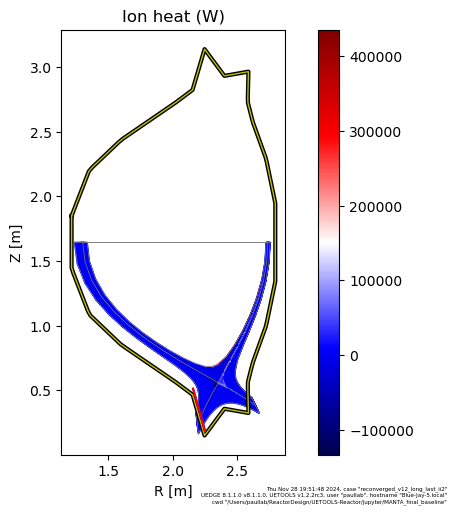

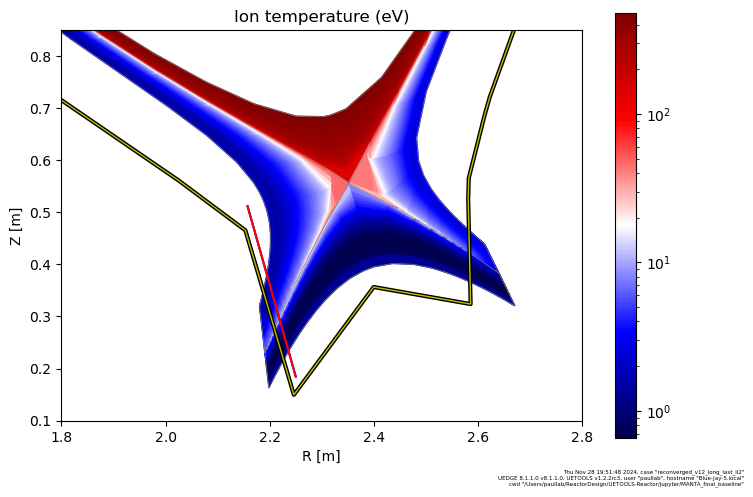

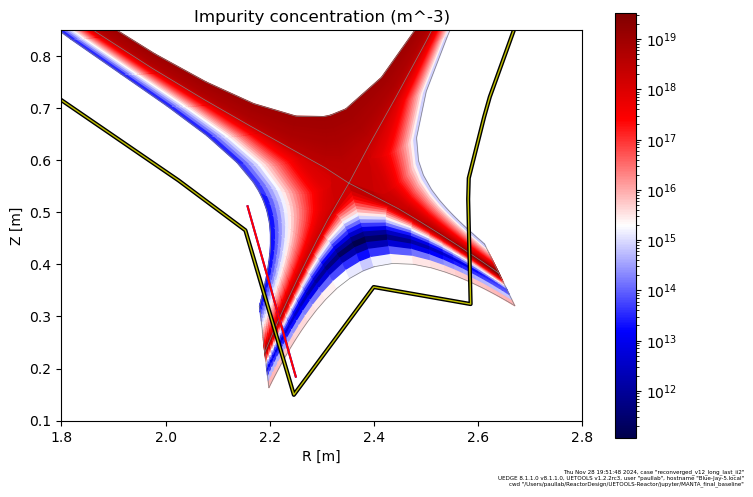

In [28]:
plt.figure()

c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   xlim=(1.8, 2.8), 
   ylim=(0.1,0.85),
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid'
  );

c.plot.mesh(
    bbb.ne, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85),
    figsize=(7,5), 
    zrange=(1e8,1e21), 
    cmap='gist_heat',
    title='Electron density'
);


c.plot.mesh(
    bbb.feex, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    # zrange=(-8e5,8e5),
    cmap='seismic',
    title='Electron heat (W)'
);
c.plot.mesh(
    bbb.te/bbb.ev, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    # zrange=(-5e5,5e5),
    cmap='seismic',
    title='Electron temperature (eV)'
);

c.plot.mesh(
    bbb.ne, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85),
    figsize=(7,5), 
    zrange=(1e10,1e22), 
    cmap='gist_heat',
    title='Ion density'
);
c.plot.mesh(
    bbb.feix, 
    # xlim=(1.8, 2.8), 
    # ylim=(0.1,0.85),
    figsize=(7,5), 
    # zrange=(-8e5,8e5),
    cmap='seismic',
    title='Ion heat (W)'
);
c.plot.mesh(
    bbb.te/bbb.ev, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    # zrange=(-5e5,5e5),
    cmap='seismic',
    title='Ion temperature (eV)'
);
c.plot.mesh(
    bbb.na, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    # zrange=(-5e5,5e5),
    cmap='seismic',
    title='Impurity concentration (m^-3)'
);
plt.show()

# Generate Grid

 
***  alfcy_inner has been re-defined  ***
 
 
     alfcy_inner =   2.642448E+00
 ***** Grid generation has been completed
 Wrote file "gridue" with runid:  TokaMaker:                                                  

 Wrote grid file successfully:
     file name:   gridue_v12_orthogonal.hdf5
     run-ID:      TokaMaker:
no new plate intersection for x,ycurveg on j=  9
*** You may have to extend the plate end points


RuntimeError: 

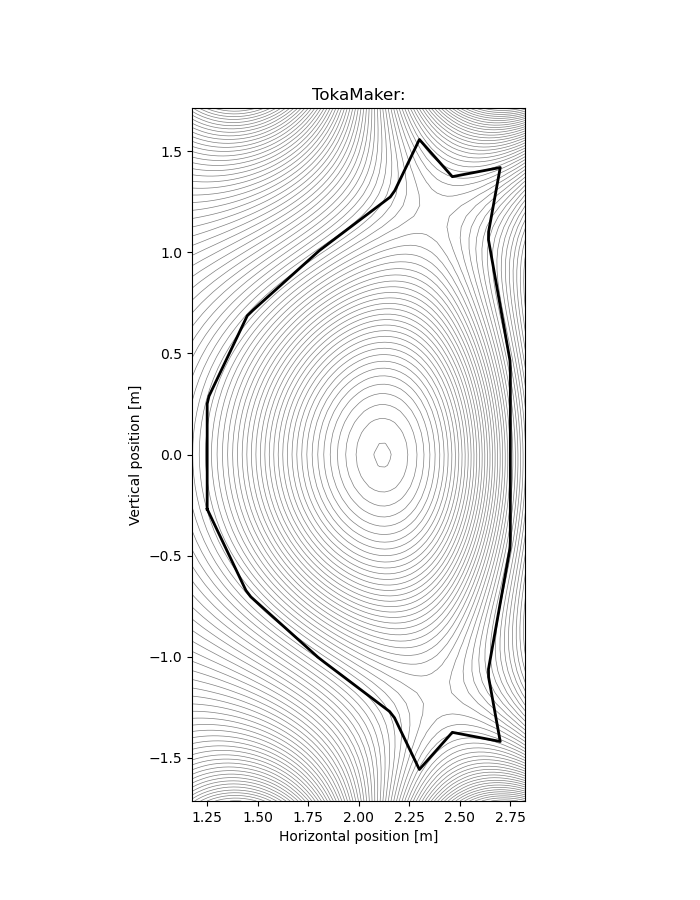

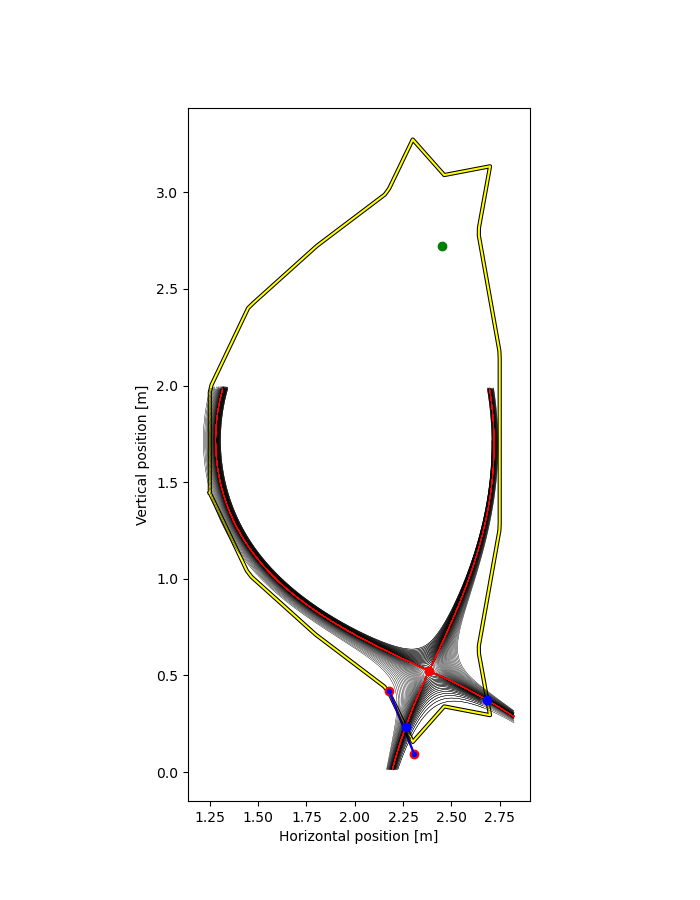

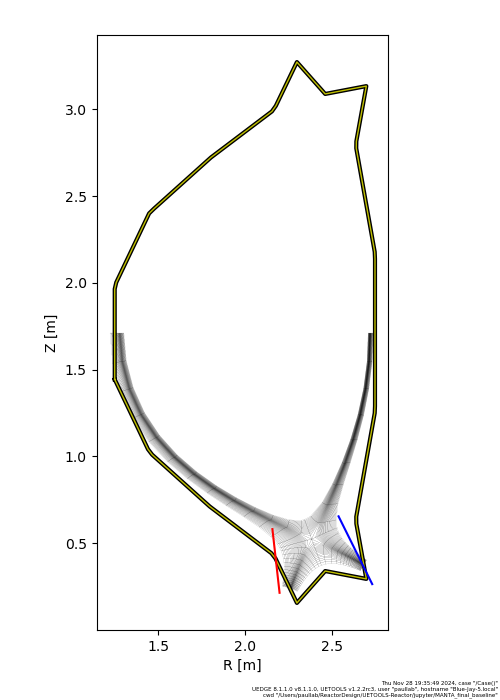

In [4]:
%matplotlib widget
from gridgen_v12_morphed2 import setGrid
setGrid()

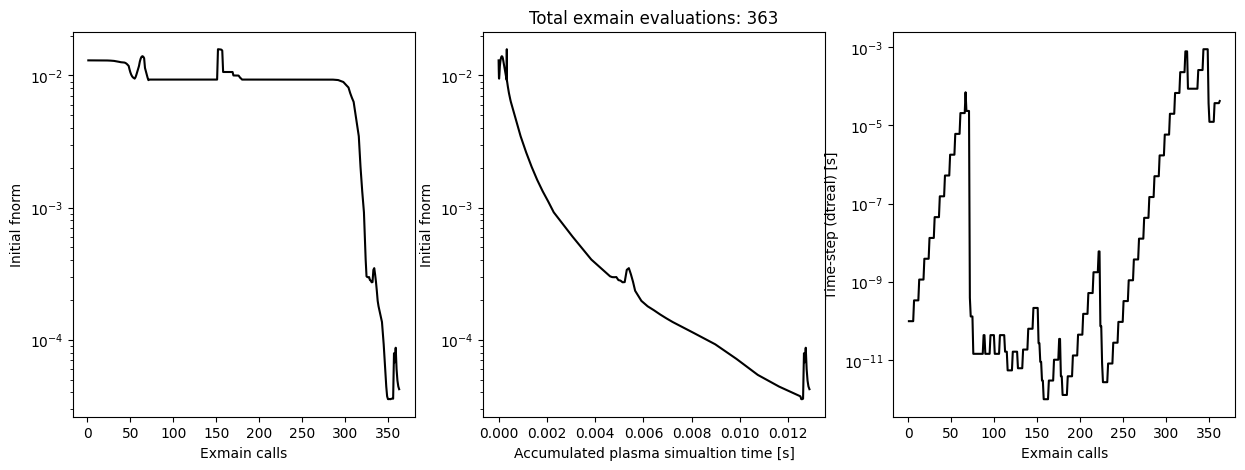

In [16]:
c = Case()
c.solver.convergenceanalysis('reconverged_v12_p3.93_n2.38_imp8.5e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5');

# Gridmorph

In [2]:
c = Case('input_v9_integrated_puff.yaml')

No diffusivity-file supplied: reading from save-file ".../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff2_last_ii2.hdf5"
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff2_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_v9_integrated_puff2_last_ii2.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.16e-04



In [3]:
import subprocess

proc = subprocess.Popen(['caffeinate'])

try:
    c.solver.gridmorph("gridue_v9_long.hdf5", 'gridmorph2', dt=1e20)  
finally:
    # Terminate caffeinate
    proc.terminate()


*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
    -Variable(s) being solved:
                                        - gridmorph
    -Progress                             0.000%
    -Advancing by                         0.100%
    -Steps to target at current delta:    1000

  Updating Jacobian, npe =                      1
 iter=    0 fnrm=     0.6118683944166938E-02 nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.9450456961193886E-04 nfe=     58
 iter=    2 fnrm=     0.5831861877172650E-07 nfe=    123


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
===== MAIN LOOP 1/7 =====
    -Variable(s) being solved:
                                 

In [5]:
# %%capture capt
import os

directory = os.getcwd()+'/gridmorph2'
files = os.listdir(directory)
files.sort(key=lambda x: os.stat(os.path.join(directory, x)).st_mtime)
lpoints = []
rpoints = []
for file in files:
    filename = os.fsdecode(file)
    c = Case('gridmorph2/' + filename)
    bbb.fqp=0
    bbb.plateflux(); #internally calculated fluxes (postprocessing)
    ldata = 1.e-6*(bbb.sdtlb+bbb.sdrlb)
    rdata = 1.e-6*(bbb.sdtrb+bbb.sdrrb)
    lpoints.append(max(ldata))
    rpoints.append(max(rdata))
    print(f'Left max: {max(ldata)}, right max: {max(rdata)}', file=sys.stderr)
    
    

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress0p100.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress0p100.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress0p100.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 4.72e-04



Left max: [8.26610141], right max: [8.95941156]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress1p140.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress1p140.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress1p140.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 37.2



Left max: [8.24692142], right max: [8.96731428]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress3p692.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress3p692.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress3p692.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 7.63e+00



Left max: [8.20110855], right max: [8.98229262]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress9p887.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress9p887.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress9p887.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 25.8



Left max: [8.11456877], right max: [8.98148205]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress19p524_staticiter.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress19p524_staticiter.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress19p524_staticiter.hdf5

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 4.19e+07



Left max: [8.01802048], right max: [8.95570691]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress21p524_dtrun_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress21p524_dtrun_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress21p524_dtrun_last_ii2.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.11e-03



Left max: [7.7285862], right max: [8.95495721]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress22p109.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress22p109.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress22p109.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.11e-03



Left max: [7.7285862], right max: [8.95495721]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress27p497.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress27p497.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress27p497.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 26.4



Left max: [7.68118121], right max: [8.90759263]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress40p897.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress40p897.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress40p897.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 28.3



Left max: [7.69528221], right max: [8.75487852]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress64p423.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress64p423.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress64p423.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.00e+00



Left max: [7.63373113], right max: [7.86236023]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress80p013.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress80p013.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress80p013.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 2.10e+02



Left max: [7.66188327], right max: [6.7945195]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress93p576.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress93p576.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress93p576.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.36e+00



Left max: [7.62145712], right max: [6.02492082]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress98p292_staticiter.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress98p292_staticiter.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress98p292_staticiter.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 4.60e+07



Left max: [7.55722427], right max: [5.68264015]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress100p000_dtrun_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress100p000_dtrun_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress100p000_dtrun_last_ii2.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 6.31e-02



Left max: [7.25360842], right max: [5.66914867]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/progress100p000_staticiter.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/progress100p000_staticiter.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/progress100p000_staticiter.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 6.31e-02



Left max: [7.25360842], right max: [5.66914867]


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../MANTA_final_baseline/gridmorph2/SUCCESS.hdf5
  User-specified diffusivities read from HDF5 file ".../MANTA_final_baseline/gridmorph2/SUCCESS.hdf5"
UETOOLS-style save successfully restored from .../MANTA_final_baseline/gridmorph2/SUCCESS.hdf5
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   17
  fy search failure at ix,iy =                    16                   18

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 6.31e-02



Left max: [7.25360842], right max: [5.66914867]


IndexError: invalid index to scalar variable.

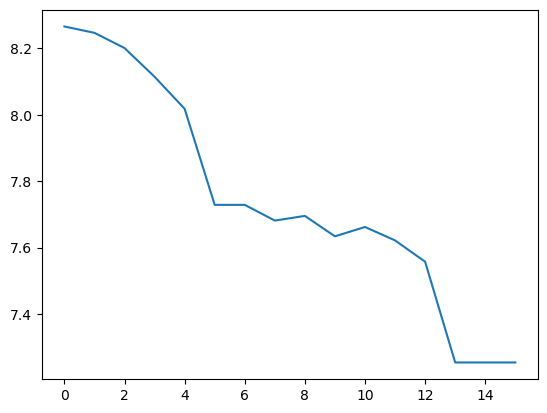

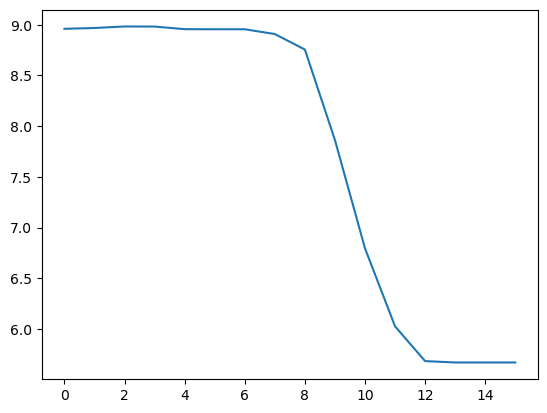

In [15]:
plt.figure()
plt.plot(np.arange(0,16), [item[0] for item in lpoints])
plt.figure()
plt.plot(np.arange(0,16), [item[0] for item in rpoints])